# EDL
Para realizar nuestro EDA vamos a utilizar los datos obtenidos de la API, que se descargaron en la carpeta datastreams y luego nosotros aplicamos ETL y guardamos en la carpeta datasets.
De acuerdo a la primera previsualizacion de los datos que realizamos, vamos a enfocar nuestro análisis en 3 grupos:
* 1. Vamos a utlizar los archivos "acceso a internet" para analizar como fue la evolución de internet y su tecnologia a traves de los años de acuerdo a las provincias. 
* 2. Vamos a utilizar los archivos "penetración de internet fijo por provincias" tanto por accesos cada 100 habitantes como por cada 100 hogares.
* 3. Vamos a utilizar los archivos "total nacional de accesos a internet" para ver la evolución nacional por tipo de tecnologia. 


In [1]:
# Iniciamos importando las librerias 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Archivo: Acceso a internet fijo por tecnologia y por provincias

In [11]:
df1 = pd.read_csv('./datasets/acceso_a_internet_fijo_por_tecnologia_y_provincias.csv')

In [12]:
df1.head()


,Unnamed: 0,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,0,2022,4,Buenos Aires,3260,30,10,1300,720,50
1,1,2022,4,Capital Federal,1390,10,1390,50,320,20
2,2,2022,4,Catamarca,90,110,470,10,20,710
3,3,2022,4,Chaco,250,610,470,80,30,1440
4,4,2022,4,Chubut,450,740,100,310,90,1690


Vemos que en nuestro archivo nos quedo una columna que no vamos a utilizar "unnamed: 0" y la columna "Total" no esta totalizando los totales de las tecnologias. A su vez, vemos que los datos numeros traidos del datastream de la API son valores muy chicos o no estan expresados de forma correcta, por lo que buscamos otro dataset en la pagina de ENACOM y encontramos un excel que datos correctos que lo guardamos dentro de la carpeta complementos.

In [13]:
nombre_de_la_hoja = 'Accesos Por Tecnología'
df1 = pd.read_excel('./complementos/Internet_Accesos-por-tecnologia.xlsx', sheet_name=nombre_de_la_hoja)

In [14]:
df1.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17
0,2022,4,Buenos Aires,325908,2767247,1499149,129910,72451,4794665,NaN,NaN,Buenos Aires,325908.0,2767247.0,1499149.0,129910.0,72451.0,4794665.0
1,2022,4,Capital Federal,138753,1238196,138548,4603,31826,1551926,NaN,NaN,Capital Federal,138753.0,1238196.0,138548.0,4603.0,31826.0,1551926.0
2,2022,4,Catamarca,8952,10998,47337,1379,2243,70909,NaN,NaN,Catamarca,8952.0,10998.0,47337.0,1379.0,2243.0,70909.0
3,2022,4,Chaco,24582,61265,47285,7957,2574,143663,NaN,NaN,Chaco,24582.0,61265.0,47285.0,7957.0,2574.0,143663.0
4,2022,4,Chubut,45450,73923,9815,30721,8850,168759,NaN,NaN,Chubut,45450.0,73923.0,9815.0,30721.0,8850.0,168759.0


In [15]:
eliminar_columnas = ['Unnamed: 9','Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17']

In [16]:
df1 = df1.drop(columns=eliminar_columnas)

In [17]:
df1.head()

,Año,Trimestre,Provincia,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2022,4,Buenos Aires,325908,2767247,1499149,129910,72451,4794665
1,2022,4,Capital Federal,138753,1238196,138548,4603,31826,1551926
2,2022,4,Catamarca,8952,10998,47337,1379,2243,70909
3,2022,4,Chaco,24582,61265,47285,7957,2574,143663
4,2022,4,Chubut,45450,73923,9815,30721,8850,168759


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           864 non-null    int64 
 1   Trimestre     864 non-null    int64 
 2   Provincia     864 non-null    object
 3   ADSL          864 non-null    int64 
 4   Cablemodem    864 non-null    int64 
 5   Fibra óptica  864 non-null    int64 
 6   Wireless      864 non-null    int64 
 7   Otros         864 non-null    int64 
 8   Total         864 non-null    int64 
dtypes: int64(8), object(1)
memory usage: 60.9+ KB


In [9]:
# Exporto el df1 procesado para usar en una base de datos de SQL para luego utilizar en PowerBI
df1.to_csv('./data_sql/Acceso_internet_por_tecnologia_y_provincias.csv')

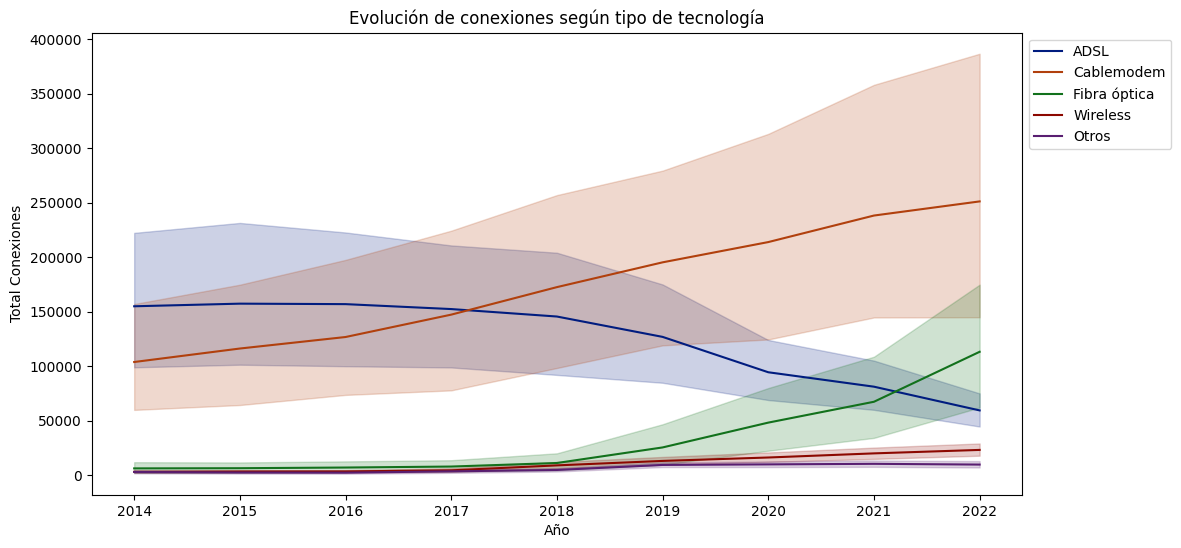

In [19]:
# Reorganiza el DataFrame para facilitar el trazado
df1_melted = pd.melt(df1, id_vars=['Año', 'Trimestre', 'Provincia', 'Total'], var_name='Tecnologia', value_name='Totales')

# Convierte 'Año' a tipo categórico para asegurar el orden correcto en el gráfico
df1_melted['Año'] = pd.Categorical(df1_melted['Año'])

# Graficar un lineplot con las categorías en el eje hue
plt.figure(figsize=(12, 6))  
sns.lineplot(x='Año', y='Totales', hue='Tecnologia', data=df1_melted, palette="dark") 

plt.xlabel('Año')
plt.ylabel('Total Conexiones')
plt.title('Evolución de conexiones según tipo de tecnología')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

En este primer gráfico, se puede visualizar a nivel nacional que las tecnologias Cablemodem y Fibra Optica van en aumento con el correr de los años, teniendo un gran crecimiento la fibra optica a partir del año 2018, siendo esta de mayor tecnologia. Tambien vemos que las conexiones ADSL, que son de tecnologia mas antiguas van decayendo con el correr de los años. 

A continuacion vamos a realizar otro gráfico para ver las tecnologias que predominan en cada provincia

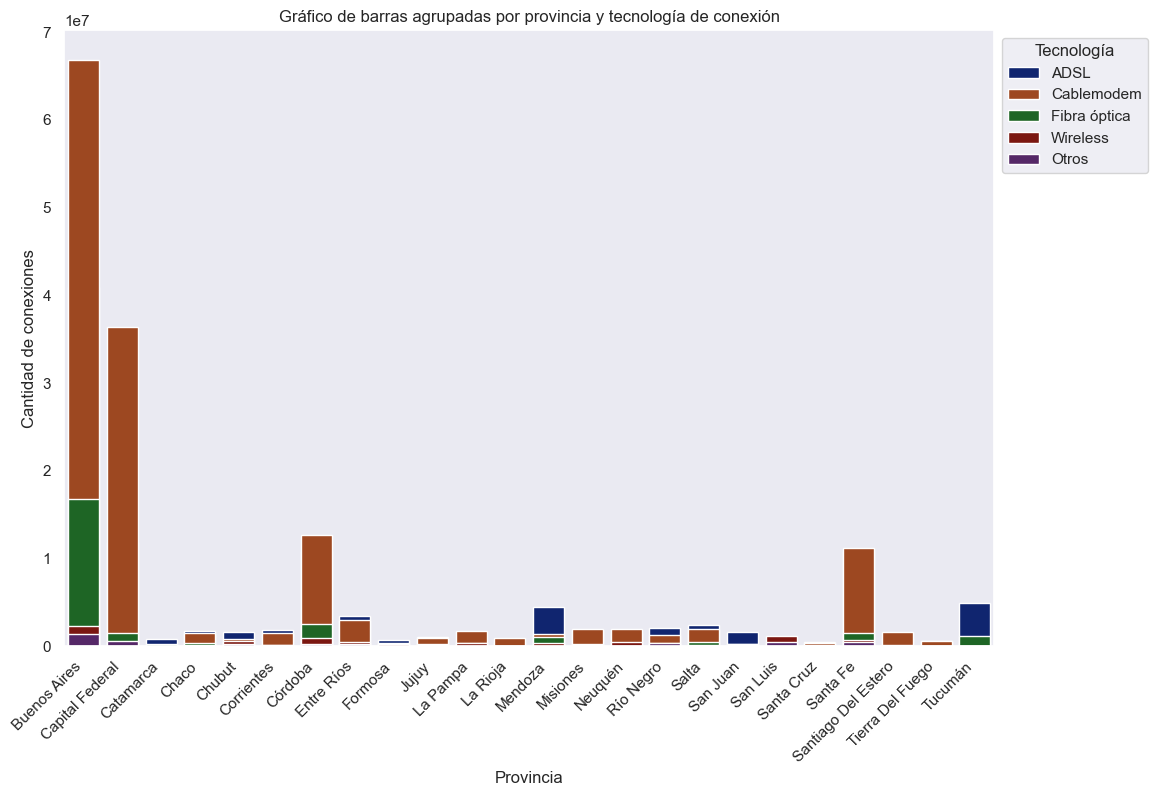

In [151]:
# Seleccionar las columnas relevantes
df_provincias = df1[['Provincia', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']]

# Asegurarse de que hay un solo valor por cada provincia utilizando groupby
df_provincias_grouped = df_provincias.groupby('Provincia').sum().reset_index()

# Reorganizar el DataFrame para facilitar el trazado
df_provincias_melt = pd.melt(df_provincias_grouped, id_vars='Provincia', var_name='Categoria', value_name='Cantidad')

sns.set(style='dark')

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 8))
sns.barplot(x='Provincia', y='Cantidad', hue='Categoria', data=df_provincias_melt, palette="dark", dodge=False)

plt.title('Gráfico de barras agrupadas por provincia y tecnología de conexión')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de conexiones')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tecnología', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

A nivel provincias, podemos ver tambien que predomina las conexiones de Cablemodem como principal tecnologia. Buenos Aires es la provincia con mayores conexiones, la siguen Capital Federal, Cordoba y Santa Fe. El resto de las provincias tiene un numero mucho menor de conexiones, ya que tambien tienen mucha menos poblacion que las provincias mencionadas. 
Otro analisis que podemos hacer es que las provincias de Mendoza, San Juan y Tucuman, predomia las conexiones ADSL, una tecnologia que fue bajando con el correr de los años como vimos en el grafico anterior.

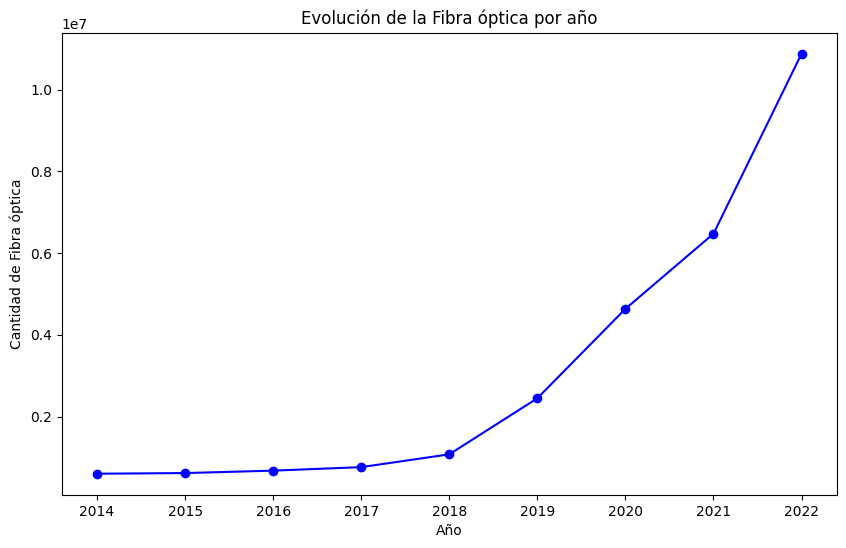

In [20]:
df_fibra_anual = df1.groupby('Año')['Fibra óptica'].sum()

# Crea un gráfico de línea
df_fibra_anual.plot(kind='line', marker='o', linestyle='-', color='b', figsize=(10, 6))

# Configura el título y las etiquetas
plt.title('Evolución de la Fibra óptica por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Fibra óptica')

plt.show()

### Archivo: Acceso a banda ancha y banda angosta por provincia

In [76]:
df2 = pd.read_csv('./datasets/accesos_a_banda_ancha_y_banda_angosto_por_provincia.csv')

In [77]:
df2.head()

,Unnamed: 0,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,0,2022,4,Buenos Aires,5,60,5
1,1,2022,4,Capital Federal,2,20,2
2,2,2022,4,Catamarca,71,10,71
3,3,2022,4,Chaco,144,50,144
4,4,2022,4,Chubut,168,9040,169


Vemos al ver los numeros que tenemos error en el archivo que importamos desde la API, por lo tanto vamos a descargar otro archivo desde la pagina de ENACOM. El archivo se encuentra en la carpeta complementos y esta en formato de excel. 

In [78]:
nombre_de_hoja = 'Dial-BAf'
df2 = pd.read_excel('./complementos/Internet_BAF.xlsx', sheet_name=nombre_de_hoja)

In [79]:
df2.head()

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,4788466,6199.0,4794665
1,2022,4,Capital Federal,1549781,2145.0,1551926
2,2022,4,Catamarca,70908,1.0,70909
3,2022,4,Chaco,143658,5.0,143663
4,2022,4,Chubut,167855,904.0,168759


In [82]:
# Exportamos nuestro dataframe procesado para usar en una base de datos de SQL para luego utilizar en PowerBI
df2.to_csv('./data_sql/Acceso_a_banda_ancha_y_banda_angosto_por_provincia.csv')

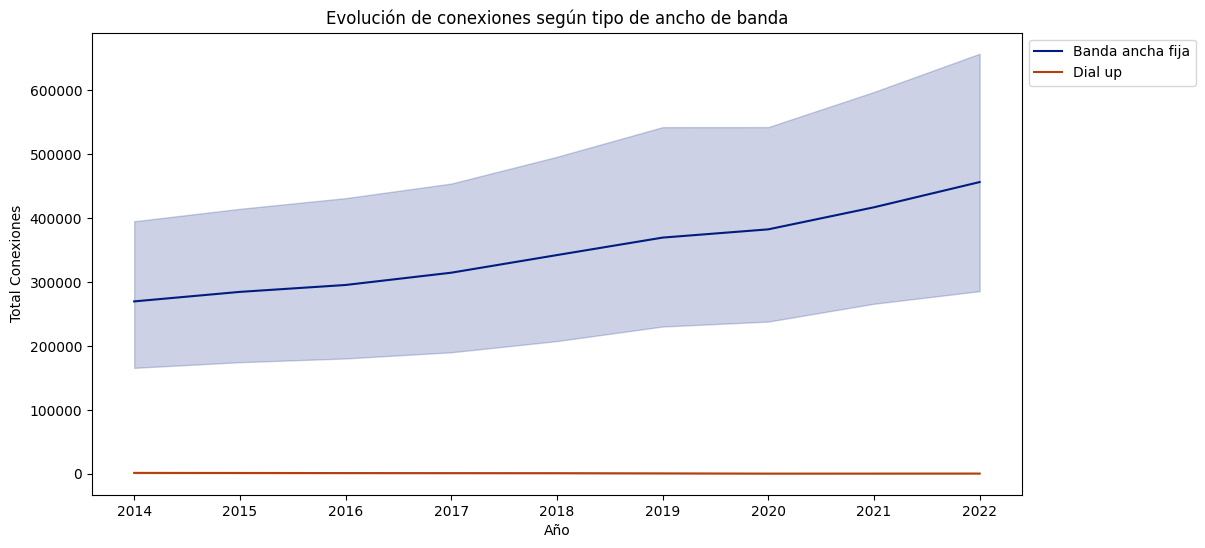

In [80]:
# Reorganiza el DataFrame para facilitar el trazado
df2_melted = pd.melt(df2, id_vars=['Año', 'Trimestre', 'Provincia', 'Total'], var_name='Bandas', value_name='Totales')

# Convierte 'Año' a tipo categórico para asegurar el orden correcto en el gráfico
df2_melted['Año'] = pd.Categorical(df2_melted['Año'])

# Graficar un lineplot con las categorías en el eje hue
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura según tus preferencias
sns.lineplot(x='Año', y='Totales', hue='Bandas', data=df2_melted, palette="dark") 

plt.xlabel('Año')
plt.ylabel('Total Conexiones')
plt.title('Evolución de conexiones según tipo de ancho de banda')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

Vemos que a nivel nacional, desde el 2014 ya son casi nulas o muy pocas las conexiones Dial Up, ya que las conexiones Dial Up son muy antiguas y se encuentran casi en desuso en estos tiempos. A su vez vemos un crecimiento constante de las conexiones de banda ancha. 

A continuación vamos a realizar un gráfico que nos muestre como son las conexiones por provincias.

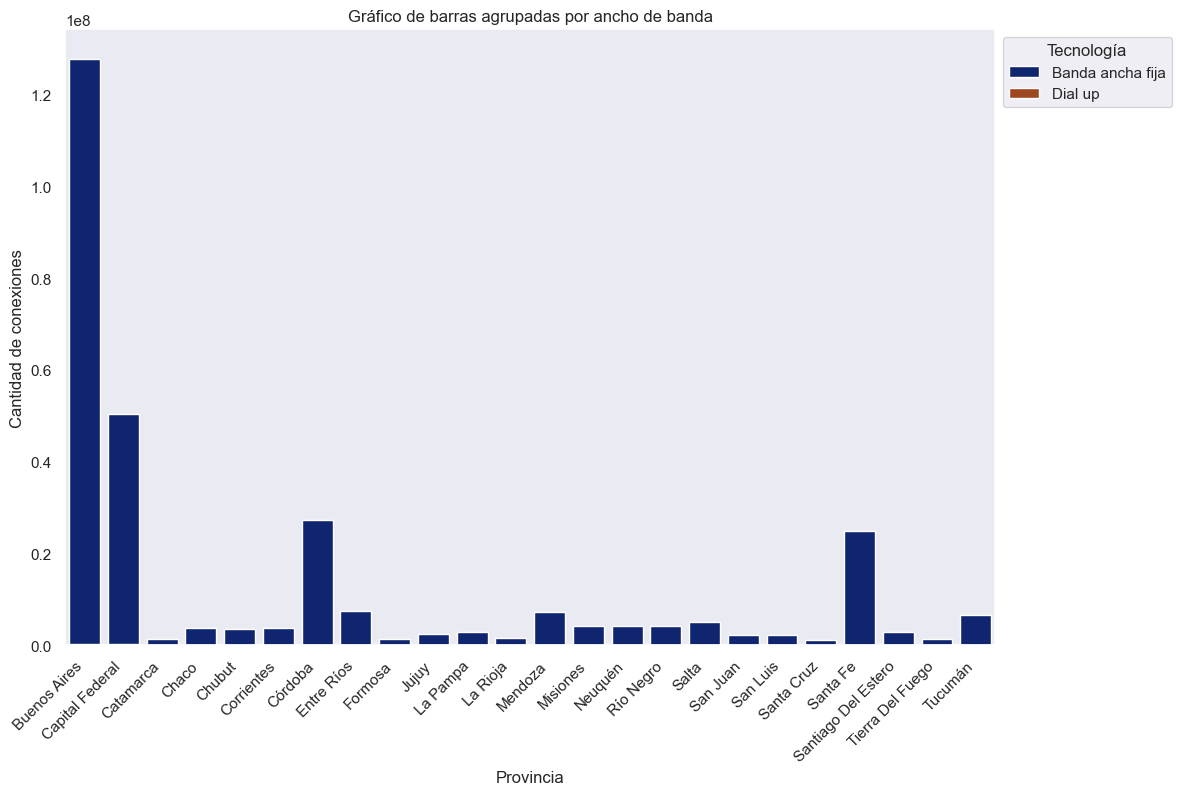

In [81]:
# Seleccionar las columnas relevantes
df2_provincias = df2[['Provincia', 'Banda ancha fija', 'Dial up']]

# Asegurarse de que hay un solo valor por cada provincia utilizando groupby
df2_provincias_grouped = df2_provincias.groupby('Provincia').sum().reset_index()

# Reorganizar el DataFrame para facilitar el trazado
df2_provincias_melt = pd.melt(df2_provincias_grouped, id_vars='Provincia', var_name='Categoria', value_name='Cantidad')

sns.set(style='dark')

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 8))
sns.barplot(x='Provincia', y='Cantidad', hue='Categoria', data=df2_provincias_melt, palette="dark", dodge=False)

plt.title('Gráfico de barras agrupadas por ancho de banda')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de conexiones')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tecnología', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

Siguiendo la tendencias del archivo anterior y del analisis anterior, las conexiones Dial up son casi inexistentes y las provincias con mayores conexiones siguen siendo Buenos Aires, Capital Federal, Cordoba y Santa Fe.

### Archivo: Acceso a internet fijo por rangos de velocidad de bajada y por provincia

In [83]:
df3 = pd.read_csv('./datasets/acceso_a_internet_fijo_por_rangos_de_velocidad_de_bajada_y_provincia.csv')

In [84]:
df3.head()

,Unnamed: 0,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,0,2022,4,Buenos Aires,28934,23347,259866,28155,244555,9867,3760109,97634.0,4794665
1,1,2022,4,Capital Federal,5160,5096,31320,64653,36336,8116,1299117,106772.0,1551926
2,2,2022,4,Catamarca,710,3150,2716,5028,4638,3122,52739,228.0,70909
3,3,2022,4,Chaco,4610,7710,16067,17846,6704,3039,94866,3909.0,143663
4,4,2022,4,Chubut,1090,1614,46457,31007,34728,1577,19048,20026.0,168759


Vemos que existe otro archivo tambien diferente a los bajados por la API, y encontramos algunos datos erroneos en las columnas, por lo siguiendo los pasos anteriores, importamos un archivo de excel para trabajar y realizar nuestro analisis.

In [85]:
nombre_hoja = 'Accesos por velocidad'
df3 = pd.read_excel('./complementos/Internet_Accesos-por-velocidad.xlsx', sheet_name=nombre_hoja)

In [86]:
df3.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,4,Buenos Aires,28934.0,23347.0,259866.0,281550.0,244555.0,98670.0,3760109.0,97634.0,4794665.0
1,2022,4,Capital Federal,516.0,5096.0,31320.0,64653.0,36336.0,8116.0,1299117.0,106772.0,1551926.0
2,2022,4,Catamarca,71.0,315.0,2716.0,5028.0,4638.0,3122.0,52739.0,2280.0,70909.0
3,2022,4,Chaco,461.0,771.0,16067.0,17846.0,6704.0,3039.0,94866.0,3909.0,143663.0
4,2022,4,Chubut,109.0,1614.0,46457.0,31007.0,34728.0,15770.0,19048.0,20026.0,168759.0


In [87]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  864 non-null    int64  
 1   Trimestre            864 non-null    int64  
 2   Provincia            864 non-null    object 
 3   HASTA 512 kbps       864 non-null    float64
 4   + 512 Kbps - 1 Mbps  864 non-null    float64
 5   + 1 Mbps - 6 Mbps    864 non-null    float64
 6   + 6 Mbps - 10 Mbps   864 non-null    float64
 7   + 10 Mbps - 20 Mbps  864 non-null    float64
 8   + 20 Mbps - 30 Mbps  864 non-null    float64
 9   + 30 Mbps            864 non-null    float64
 10  OTROS                858 non-null    float64
 11  Total                864 non-null    float64
dtypes: float64(9), int64(2), object(1)
memory usage: 81.1+ KB


In [90]:
# Exportamos el dataframe procesado para usar en una base de datos de SQL para luego utilizar en PowerBI
df3.to_csv('./data_sql/Acceso_internet_por_rango_de_velocidad_y_provincia.csv')

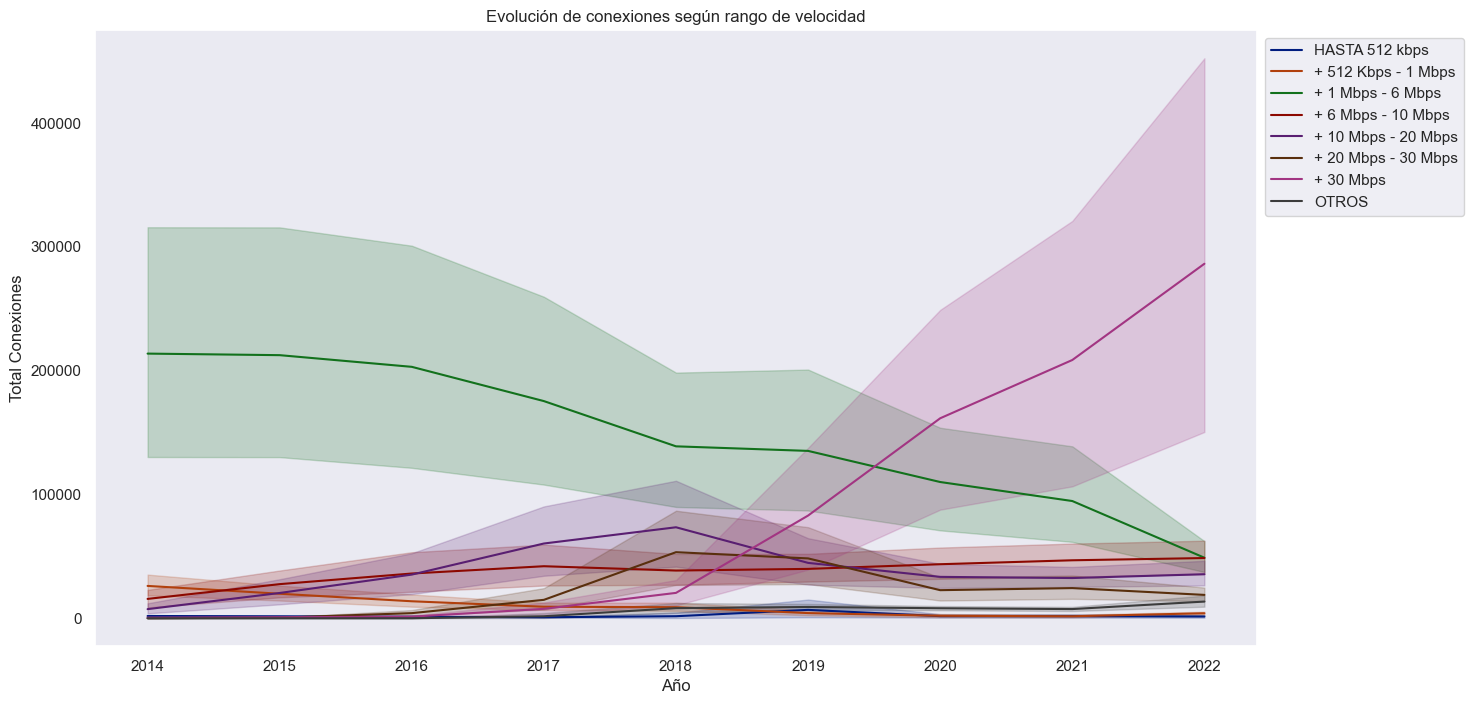

In [167]:
# Reorganiza el DataFrame para facilitar el trazado
df3_melted = pd.melt(df3, id_vars=['Año', 'Trimestre', 'Provincia', 'Total'], var_name='Velocidad', value_name='Totales')

# Convierte 'Año' a tipo categórico para asegurar el orden correcto en el gráfico
df3_melted['Año'] = pd.Categorical(df3_melted['Año'])

# Graficar un lineplot con las categorías en el eje hue
plt.figure(figsize=(15, 8))  # Ajusta el tamaño de la figura según tus preferencias
sns.lineplot(x='Año', y='Totales', hue='Velocidad', data=df3_melted, palette="dark") 

plt.xlabel('Año')
plt.ylabel('Total Conexiones')
plt.title('Evolución de conexiones según rango de velocidad')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

Como datos relevantes del gráfico podemos ver a nivel nacional la evolución y crecimiento de las conexiones de +30Mbps, mayormente a partir del 2018, que con el correr del tiempo y tecnologia, van en constante aumento y por otra parte las conexiones con una velocidad de entre 1 y 6Mbps van disminyendo con los años. El resto de las velocidades de conexiones tienen un comportamiento moderado con relacion a los 2 rangos de velocidad mencionados.

A continuación vamos a realizar un gráfico de barras agrupados por rangos de velocidad y por provincias.

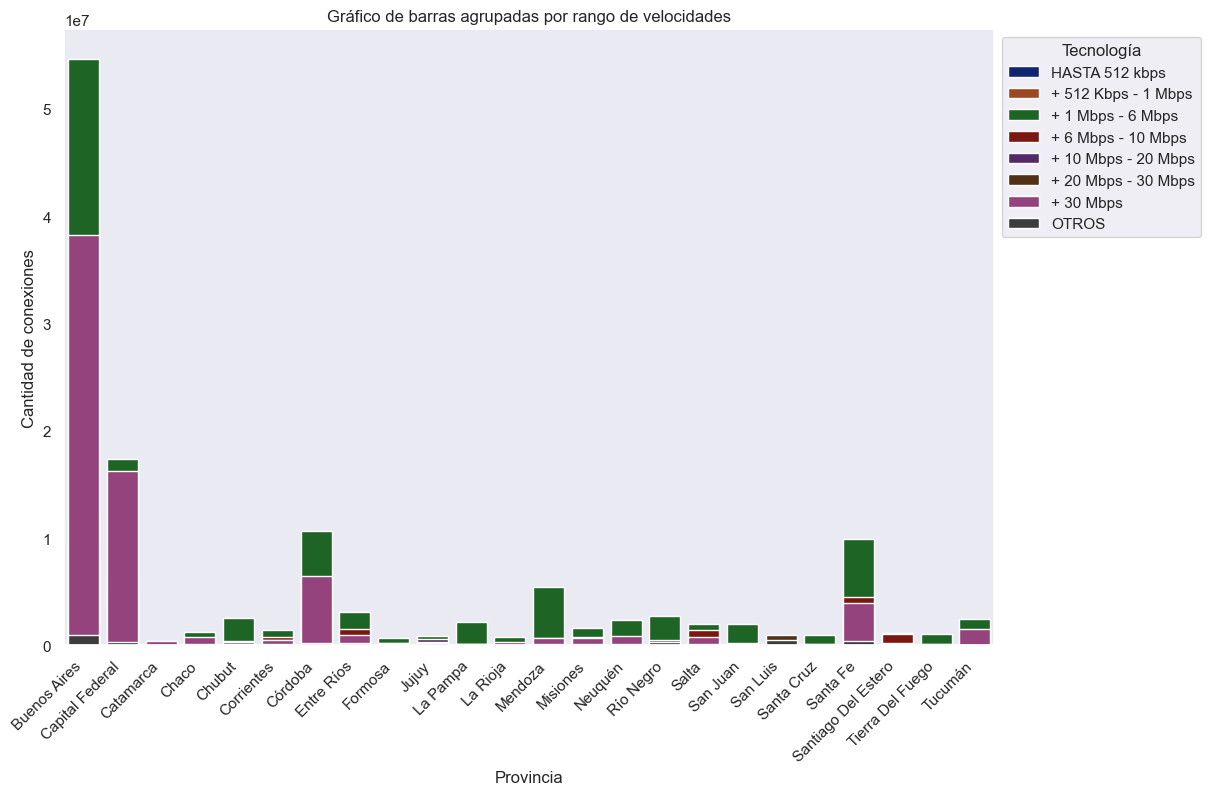

In [171]:
# Seleccionar las columnas relevantes
df3_provincias = df3[['Provincia', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps','OTROS']]

# Asegurarse de que hay un solo valor por cada provincia utilizando groupby
df3_provincias_grouped = df3_provincias.groupby('Provincia').sum().reset_index()

# Reorganizar el DataFrame para facilitar el trazado
df3_provincias_melt = pd.melt(df3_provincias_grouped, id_vars='Provincia', var_name='Categoria', value_name='Cantidad')

sns.set(style='dark')

# Crear el gráfico de barras agrupadas
plt.figure(figsize=(12, 8))
sns.barplot(x='Provincia', y='Cantidad', hue='Categoria', data=df3_provincias_melt, palette="dark", dodge=False)

plt.title('Gráfico de barras agrupadas por rango de velocidades')
plt.xlabel('Provincia')
plt.ylabel('Cantidad de conexiones')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Tecnología', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

Este grafico nos muestra que las provincias con mayores conexiones siguen siendo Buenos Aires, Capital Federal, Cordoba y Santa Fe, y las conexiones se encuentran en un rango mayor a los 30Mbps (son las que predominan) y entre 1-6Mbps, mientras que en el resto de las provincias las conexiones que predominan son las de entre 1-6Mbps.



### Archivo: Penetracion del internet fijo por provincia (accesos por cada 100 habitantes)

In [91]:
df4 = pd.read_csv('./datasets/penetracion_del_internet_fijo_por_provincia(accesos_por_cada_100_habitantes).csv')

In [92]:
df4.head()

,Unnamed: 0,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,0,2022,4,Buenos Aires,26
1,1,2022,4,Capital Federal,50
2,2,2022,4,Catamarca,16
3,3,2022,4,Chaco,11
4,4,2022,4,Chubut,26


In [93]:
df4 = df4.drop(columns='Unnamed: 0')

In [94]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Año                       864 non-null    int64 
 1   Trimestre                 864 non-null    int64 
 2   Provincia                 864 non-null    object
 3   Accesos por cada 100 hab  864 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 27.1+ KB


In [95]:
# Exportamos el dataframe procesado para usar en una base de datos de SQL para luego utilizar en PowerBI
df4.to_csv('./data_sql/Acceso_internet_por_cada_100_hab_por_provincia.csv')

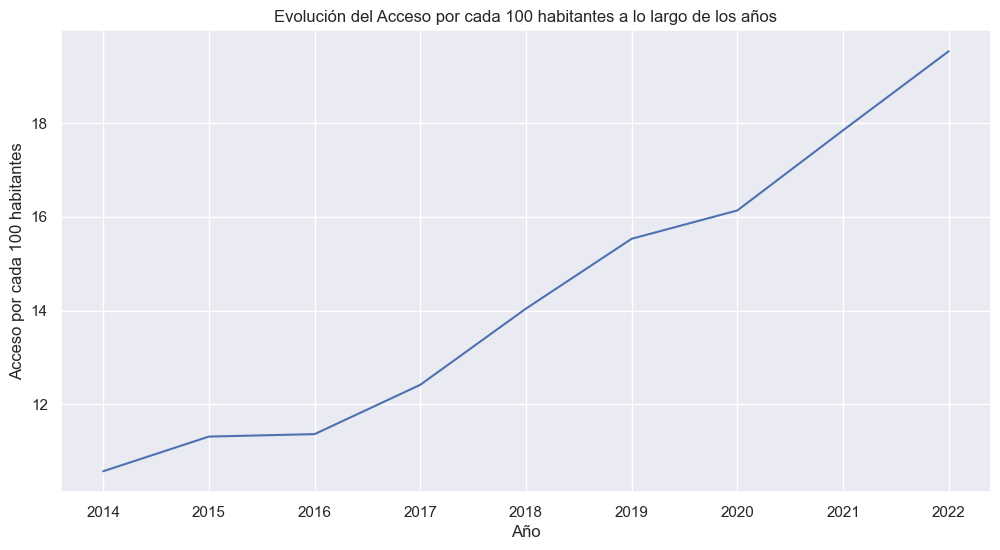

In [189]:
sns.set(style="darkgrid")

# Crear el lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Año', y='Accesos por cada 100 hab', data=df4, errorbar=None)

plt.title('Evolución del Acceso por cada 100 habitantes a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Acceso por cada 100 habitantes')

plt.show()

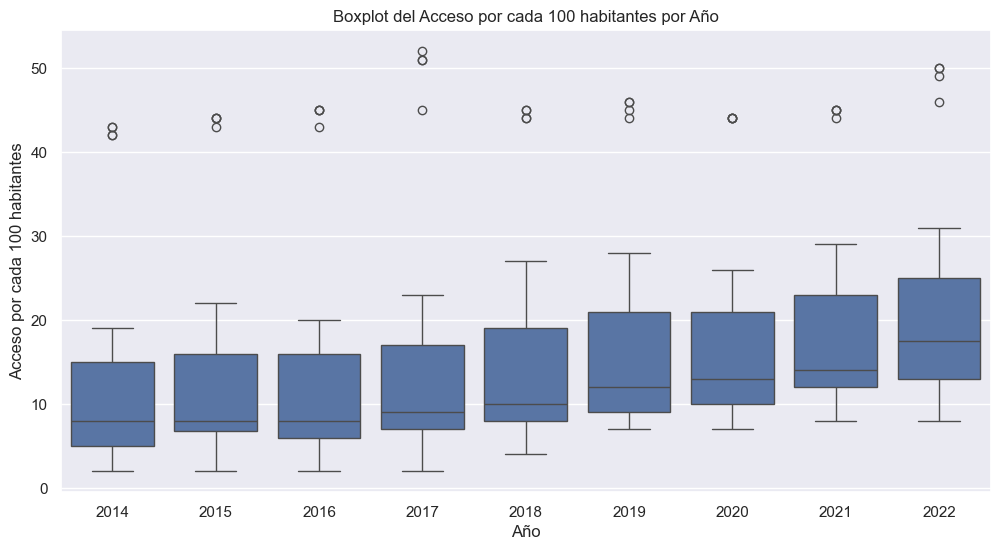

In [190]:
sns.set(style="darkgrid")

# Crear el boxplot con líneas para el promedio
plt.figure(figsize=(12, 6))
sns.boxplot(x='Año', y='Accesos por cada 100 hab', data=df4)

plt.title('Boxplot del Acceso por cada 100 habitantes por Año')
plt.xlabel('Año')
plt.ylabel('Acceso por cada 100 habitantes')

plt.show()


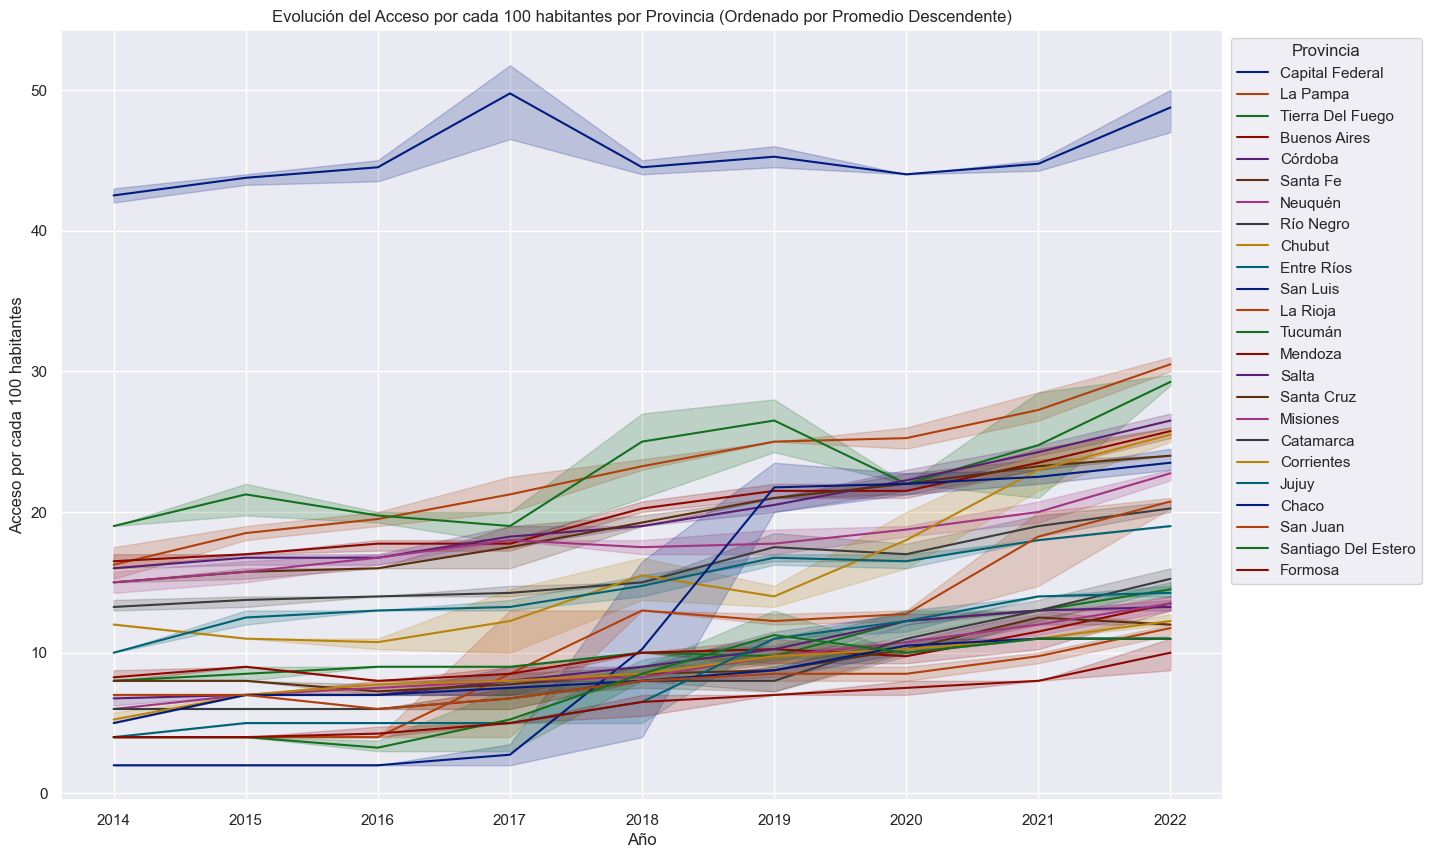

In [192]:
# Calcular el promedio por provincia
promedio_por_provincia = df4.groupby('Provincia')['Accesos por cada 100 hab'].mean().sort_values(ascending=False).index

sns.set(style="darkgrid")

# Crear el lineplot por provincias con orden descendente
plt.figure(figsize=(15, 10))
sns.lineplot(x='Año', y='Accesos por cada 100 hab', hue='Provincia', data=df4, hue_order=promedio_por_provincia, palette='dark')

plt.title('Evolución del Acceso por cada 100 habitantes por Provincia (Ordenado por Promedio Descendente)')
plt.xlabel('Año')
plt.ylabel('Acceso por cada 100 habitantes')
plt.legend(title='Provincia', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

En estos 3 graficos que realizamos podemos ver que a traves del tiempo el acceso a internet va en aumento, en promedio a nivel nacional, cada  vez son mas las personas con acceso a internet cada 100 habitantes.
Luego en el boxplot queremos ver en promedio mensual cuantas son las personas cada 100 habitantes que tienen acceso a internet y los rangos se incrementan levemente. Vemos unos valores outsiders, para ver si realmente son outsiders, pedimos una evolucion del acceso a internet cada 100 habitantes y por provincias, entonces vemos que capital federal tiene una gran diferencia con el resto.
Podemos ver que en general todas las provincias tienen un crecimiento a lo largo del tiempo, siendo capital federal la mayor cantidad de accesos a internet por cada 100 habitantes, manteniendose en un rango entre 40 y 50 personas.
A su vez, a diferencia de los graficos anteriores vemos 2 provincias, como La Pampa y Tierra del fuego, que son las que siguen a Capital Federal. Esto tambien se debe a la densidad demografica de las provincias, ya que son provincias con pocos habitantes.

### Archivo: Penetracion del internet fijo por provincias(accesos por cada 100 hogares)

In [96]:
df5 = pd.read_csv('./datasets/penetracion_del_internet_fijo_por_provincia(accesos_por_cada_100_hogares).csv')

In [97]:
df5.head()

,Unnamed: 0,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,0,2022,4,Buenos Aires,78.94
1,1,2022,4,Capital Federal,122.73
2,2,2022,4,Catamarca,65.77
3,3,2022,4,Chaco,43.62
4,4,2022,4,Chubut,85.57


In [98]:
df5 = df5.drop(columns='Unnamed: 0')

In [99]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


In [100]:
# Exportamos el dataframe procesado para usar en una base de datos de SQL para luego utilizar en PowerBI
df5.to_csv('./data_sql/Acceso_internet_por_provincias_cada_100_hogares.csv')

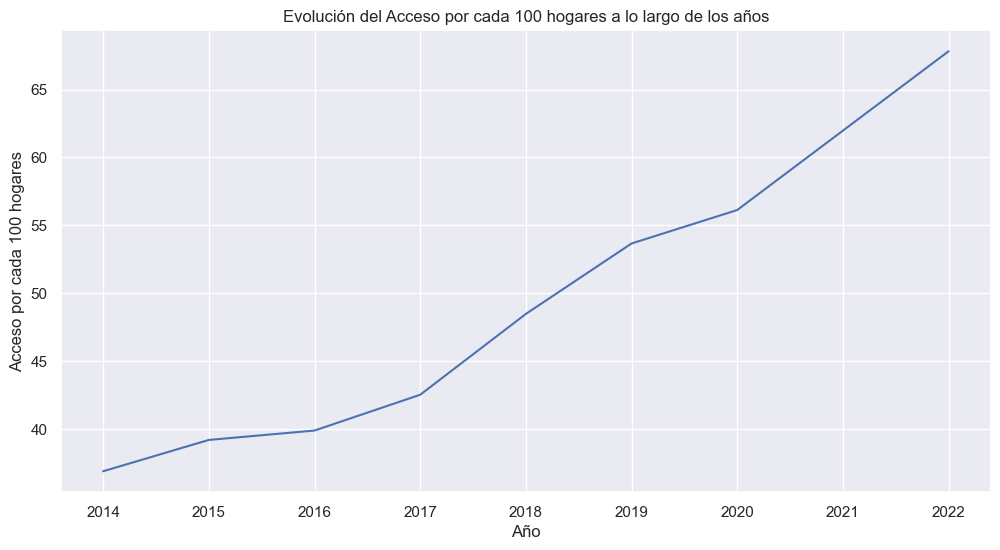

In [239]:
sns.set(style="darkgrid")

# Crear el lineplot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', data=df5, errorbar=None)

plt.title('Evolución del Acceso por cada 100 hogares a lo largo de los años')
plt.xlabel('Año')
plt.ylabel('Acceso por cada 100 hogares')

plt.show()

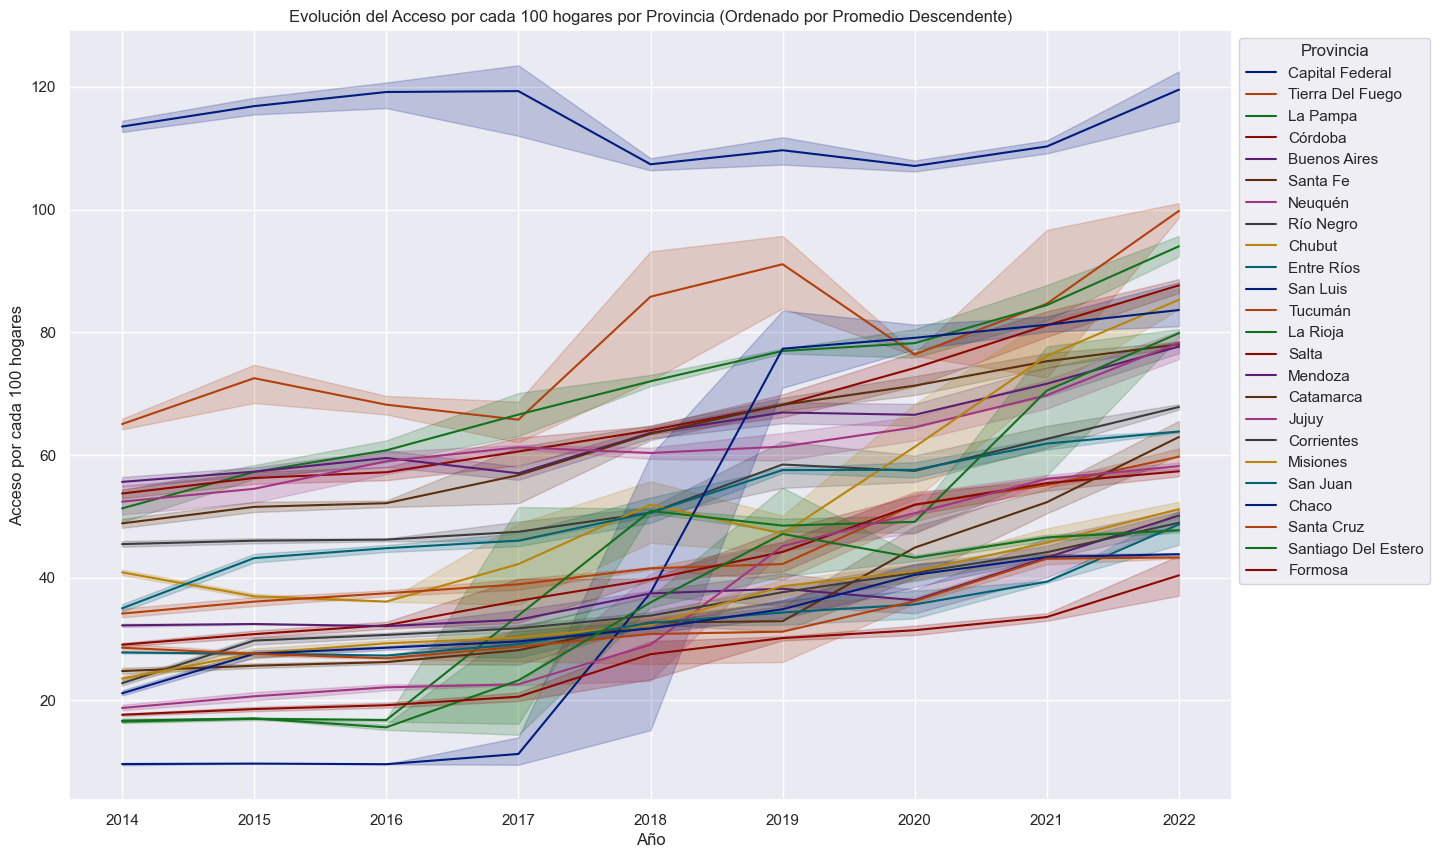

In [240]:
# Calcular el promedio por provincia
promedio_por_provincia_hogares = df5.groupby('Provincia')['Accesos por cada 100 hogares'].mean().sort_values(ascending=False).index

sns.set(style="darkgrid")

# Crear el lineplot por provincias con orden descendente
plt.figure(figsize=(15, 10))
sns.lineplot(x='Año', y='Accesos por cada 100 hogares', hue='Provincia', data=df5, hue_order=promedio_por_provincia_hogares, palette='dark')

plt.title('Evolución del Acceso por cada 100 hogares por Provincia (Ordenado por Promedio Descendente)')
plt.xlabel('Año')
plt.ylabel('Acceso por cada 100 hogares')
plt.legend(title='Provincia', bbox_to_anchor=(1, 1), loc='upper left')

plt.show()

En el análisis del acceso a internet cada 100 hogares, vemos un comportamiento similar al acceso a internet cada 100 habitantes, en este caso no es tan marcado los crecimientos, sino que se observan mas oscilaciones. Igualmente Capital Federal sigue siendo la provincia de mas acceso a internet cada 100 hogares como es en el analisis anterior. 
Entre las provincias grandes, siguen estando en la cima la provincia de Tierra del Fuego y La Pampa, por encima de Cordoba, Buenos Aires y Santa Fe. Averiguamos cual era la Densidad de dichas provincias. Tierra del fuego posee una densidad de 0,21 habitantes por km2 y La Pampa es de 2,55 habitantes por km2. Estos datos son muy bajos si los comparamos con Capital Federal que tiene 15155,96 habitantes por km2, Cordoba 24,14, Buenos Aires 57,43 y Santa Fe 26,69.
Otro punto interesante en nuestro análisis es el caso de San Luis, tiene un gran crecimiento a mas del triple de accesos a internet cada 100 hogares, esto se debe a que desde el año 2018 se realizaron obras en la provincia, se ampliaron las redes de fibra optica mas de 500km que beneficiaron a 26 localidades y parajes de la provincia.

### Ingresos por prestacion de Servicios
Vimos que en nuestro datastreams, cuando obtuvimos los datos de la API, los datos de los ingresos por la prestacion del servicios de Internet, no estaban de forma correcta, por lo que fuimos a la pagina de ENACOM a buscar los datos correctos.
Además nos encontramos con los datos de los ingresos trimestrales por la prestación del servicio de telefonía fija y de telefonía movil, con lo cual vamos a realizar una comparación para ver que servicio produjo mayores ingresos y a partir de alli sacar nuestras conclusiones. 

In [101]:
# Vamos a leer nuesta archivos que se encuentra en formato de excel.

df_internet = pd.read_excel('./complementos/ingresos_trimestrales_internet.xlsx')
df_telefonia_fija = pd.read_excel('./complementos/ingresos_trimestrales_telefonia_fija.xlsx')
df_telefonia_movil = pd.read_excel('./complementos/ingresos_trimestrales_telefonia_movil.xlsx')

In [102]:
# Empezamos viendo el archivo de ingresos trimestrales de Internet
df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Año                        36 non-null     int64  
 1   Trimestre                  36 non-null     int64  
 2   Ingresos (miles de pesos)  36 non-null     float64
 3   Periodo                    36 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.3+ KB


In [103]:
# Eliminamos columna periodo
df_internet = df_internet.drop(columns='Periodo')

In [104]:
# Pasamos datos ingresos a tipo entero
df_internet['Ingresos (miles de pesos)'] = df_internet['Ingresos (miles de pesos)'].astype(int)

In [105]:
# Reemplazamos el nombre de la columna Ingresos para identificar los Ingresos por Internet
df_internet.columns = df_internet.columns.str.replace('Ingresos (miles de pesos)', 'Ingresos Internet')

In [106]:
df_internet.head()

,Año,Trimestre,Ingresos Internet
0,2022,4,72443482
1,2022,3,64086784
2,2022,2,60419500
3,2022,1,55219313
4,2021,4,45467887


In [107]:
# Trabajamos con el archivo de Ingresos por Telefonia Fija
df_telefonia_fija.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Año                    36 non-null     int64
 1   Trimestre              36 non-null     int64
 2   Ingresos (miles de $)  36 non-null     int64
dtypes: int64(3)
memory usage: 996.0 bytes


In [108]:
# Reemplazamos nombre de Ingresos de Telefonia Fija para una mejor identificacion
df_telefonia_fija.columns = df_telefonia_fija.columns.str.replace('Ingresos (miles de $)', 'Ingresos Telefonia Fija')

In [109]:
df_telefonia_fija.head()

,Año,Trimestre,Ingresos Telefonia Fija
0,2014,1,291607175
1,2014,2,297486520
2,2014,3,310546202
3,2014,4,333969090
4,2015,1,326012475


In [110]:
# Trabajamos con el archivo de Ingresos de Telefonia Movil
df_telefonia_movil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Año                    36 non-null     int64 
 1   Trimestre              36 non-null     int64 
 2   Ingresos (miles de $)  36 non-null     int64 
 3   Periodo                36 non-null     object
dtypes: int64(3), object(1)
memory usage: 1.3+ KB


In [111]:
# Eliminamos la columna periodo
df_telefonia_movil = df_telefonia_movil.drop(columns='Periodo')

In [112]:
# Reemplazamos el nombre de Ingresos de Telefonia Movil para tener una mejor identificacion
df_telefonia_movil.columns = df_telefonia_movil.columns.str.replace('Ingresos (miles de $)', 'Ingresos Telefonia Movil')

In [113]:
df_telefonia_movil.head()

,Año,Trimestre,Ingresos Telefonia Movil
0,2014,1,15938353
1,2014,2,17680972
2,2014,3,18976053
3,2014,4,20012332
4,2015,1,19337342


In [114]:
# Realizamos el merge entre df_internet y df_telefonia_fija
df_ingresos = pd.merge(df_internet, df_telefonia_fija, on=['Año', 'Trimestre'], how='outer')

# Realiza el merge entre merge anterior y df_telefonia_movil
df_ingresos = pd.merge(df_ingresos, df_telefonia_movil, on=['Año', 'Trimestre'], how='outer')


In [115]:
df_ingresos.head()

,Año,Trimestre,Ingresos Internet,Ingresos Telefonia Fija,Ingresos Telefonia Movil
0,2022,4,72443482,3235691392,204796575
1,2022,3,64086784,2969851257,180356862
2,2022,2,60419500,312581825,153032313
3,2022,1,55219313,30583344,130454676
4,2021,4,45467887,4061605917,127389786


In [116]:
df_ingresos.to_csv('./data_sql/Ingresos_por_servicios_internet_y_telefonias.csv')

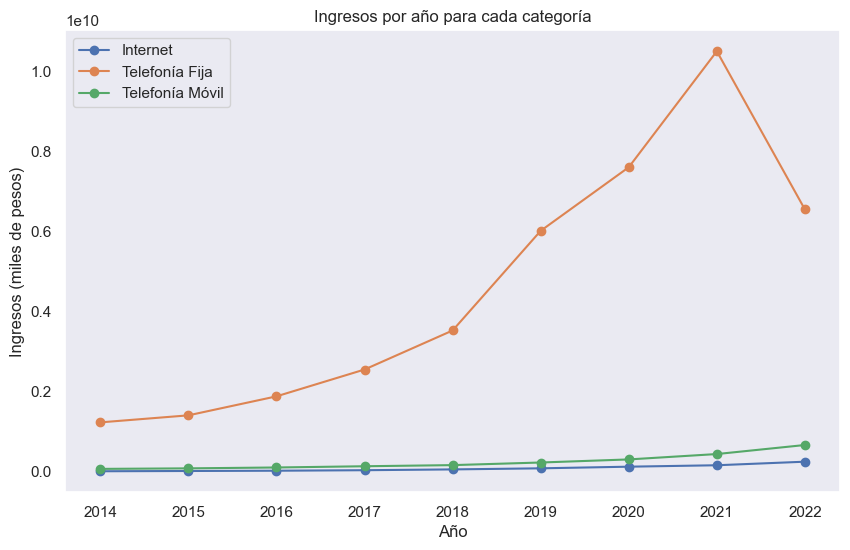

In [123]:
# Agrupa los datos por año y suma los ingresos para cada categoría
df_grouped = df_ingresos.groupby('Año').sum()

# Selecciona las columnas relevantes para el gráfico
df_plot = df_grouped[['Ingresos Internet', 'Ingresos Telefonia Fija', 'Ingresos Telefonia Movil']]

# Genera el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(df_plot.index, df_plot['Ingresos Internet'], label='Internet', marker='o')
plt.plot(df_plot.index, df_plot['Ingresos Telefonia Fija'], label='Telefonía Fija', marker='o')
plt.plot(df_plot.index, df_plot['Ingresos Telefonia Movil'], label='Telefonía Móvil', marker='o')

plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.title('Ingresos por año para cada categoría')
plt.legend()  

plt.show()

En este primer análisis de comparacion de Ingresos por la prestación de servicios de Internet, Telefonia Movil y Telefonia Fija, vemos que los ingresos por telefonia fija son mucho mayores a la telefonia movil e internet. Aunque desde el 2021 se nota una clara caida de los ingresos de telefonia fija. Para seguir investigando sobre estas comparativasl vamos analizar como es la penetracion del acceso de telefonia fija y movil por cada 100 habitantes a nivel nacional y compararlos con el acceso a internet ya analizado anteriormente. Para esto encontramos los archivos en la pagina de ENACOM en formato excel y se encuentran en la carpeta complementos. Analizamos el acceso cada 100 habitantes a nivel nacional, ya que es el dato que tenemos disponible para los 3 servicios.

In [27]:
# Trabajamos con el archivo de Accesos a telefonia Fija
df6 = pd.read_csv('./complementos/telefonia_fija.csv',decimal=',', thousands='.')

In [28]:
df6.head()

,Año,Trimestre,Provincia,Accesos telefonía fija por cada 100 hab,Accesos telefonía fija por cada 100 hogares
0,2014,1,Buenos Aires,26.72,85.26
1,2014,1,Capital Federal,52.66,128.57
2,2014,1,Catamarca,10.03,39.45
3,2014,1,Chaco,9.09,34.02
4,2014,1,Chubut,17.66,57.59


In [29]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Año                                          864 non-null    int64  
 1   Trimestre                                    864 non-null    int64  
 2   Provincia                                    864 non-null    object 
 3   Accesos telefonía fija por cada 100 hab      864 non-null    float64
 4   Accesos telefonía fija por cada 100 hogares  864 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 33.9+ KB


In [34]:
# Agrupamos por Año y Trimestre y calculamos un promedio en los accesos por cada 100 habitantes
df6 = df6.groupby(['Año', 'Trimestre'])['Accesos telefonía fija por cada 100 hab'].mean().reset_index().apply(lambda x: round(x, 2))


In [37]:
# Verificamos los años con los que contamos para el analisis
df6['Año'].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [38]:
# Trabajamos con el archivo de Accesos a telefonia movil
df7 = pd.read_csv('./complementos/Telefonia_movil.csv')

In [39]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       40 non-null     int64  
 1   Trimestre                 40 non-null     int64  
 2   Accesos por cada 100 hab  40 non-null     float64
 3   Periodo                   40 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 1.4+ KB


In [19]:
df7.head()

,Año,Trimestre,Accesos por cada 100 hab,Periodo
0,2013,1,15.437,Ene-Mar 2013
1,2013,2,15.600,Abr-Jun 2013
2,2013,3,15.859,Jul-Sept 2013
3,2013,4,15.937,Oct-Dic 2013
4,2014,1,14.807,Ene-Mar 2014


In [21]:
# Aplicamos un redondeo para la columna del dato de accesos por cada 100 habitantes para que quede de igual formato al anterior
df7['Accesos por cada 100 hab'] = df7['Accesos por cada 100 hab'].apply(lambda x: round(x, 2))

In [40]:
# Eliminamos columna Periodo
df7 = df7.drop(columns='Periodo')

In [42]:
# Verificamos los años con los que contamos en el dataset
df7['Año'].unique()

array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

In [44]:
# Como en este dataset tenemos año 2013 y en el resto no lo tenemos, seleccionamos con los años que vamos a trabajar
anios = [2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
df7 = df7[df7['Año'].isin(anios)]

In [45]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 4 to 39
Data columns (total 3 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Año                       36 non-null     int64  
 1   Trimestre                 36 non-null     int64  
 2   Accesos por cada 100 hab  36 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 1.1 KB


In [46]:
# Realizamos un merge entre los 2 archivos de Accesos a telefonia fija y movil
telefonias = pd.merge(df6, df7, on=['Año', 'Trimestre'])

In [47]:
telefonias.head()

,Año,Trimestre,Accesos telefonía fija por cada 100 hab,Accesos por cada 100 hab
0,2014,1,16.05,14.807
1,2014,2,16.00,14.300
2,2014,3,16.03,14.344
3,2014,4,16.08,14.260
4,2015,1,16.52,14.012


In [48]:
# Renombramos columnas para mejor identificacion
telefonias = telefonias.rename(columns={'Accesos por cada 100 hab': 'Accesos telefonía movil por cada 100 hab'})

In [59]:
# Traemos el archivo del df4 utilizado anteriormente
df4.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hab
0,2022,4,Buenos Aires,26
1,2022,4,Capital Federal,50
2,2022,4,Catamarca,16
3,2022,4,Chaco,11
4,2022,4,Chubut,26


In [60]:
# Agrupamos en el dataframe para que quede similar a los arhivos antes mergeados.
df4_grouop = df4.groupby(['Año', 'Trimestre'])['Accesos por cada 100 hab'].mean().reset_index().apply(lambda x: round(x, 2))

In [62]:
# Realiamos un merge entre los Accesos a telefonia movil y fija con Accesos a Internet por medio de Año y Trimestre
telefonias_internet = pd.merge(telefonias, df4_grouop, on=['Año', 'Trimestre'])

In [63]:
telefonias_internet.head()

,Año,Trimestre,Accesos telefonía fija por cada 100 hab,Accesos telefonía movil por cada 100 hab,Accesos por cada 100 hab
0,2014,1,16.05,14.807,10.38
1,2014,2,16.00,14.300,10.50
2,2014,3,16.03,14.344,10.75
3,2014,4,16.08,14.260,10.67
4,2015,1,16.52,14.012,11.12


In [64]:
# Renombramos columna para mejor identificacion
telefonias_internet = telefonias_internet.rename(columns={'Accesos por cada 100 hab': 'Accesos internet por cada 100 hab'})

In [124]:
# Exportamos el dataframe procesado para usar en una base de datos de SQL para luego utilizar en PowerBI
telefonias_internet.to_csv('./data_sql/Comparacion_accesos_internet_telefonias.csv')

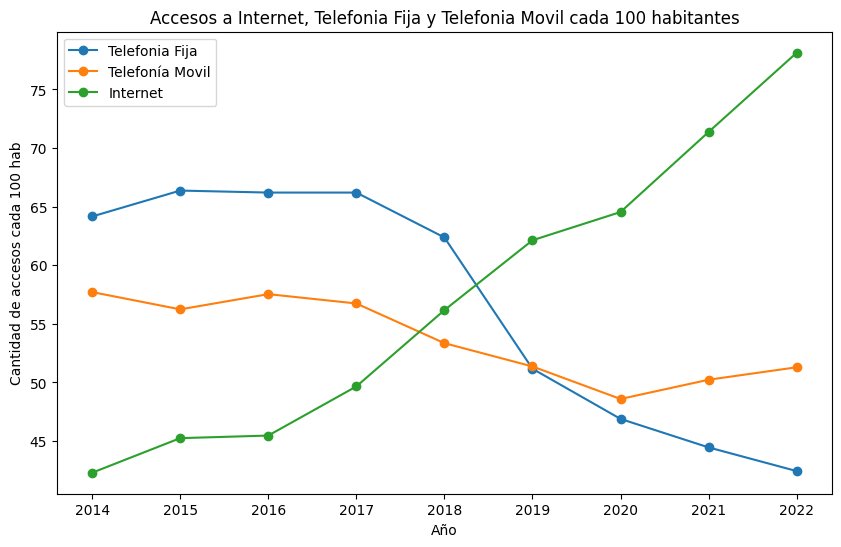

In [65]:
# Agrupa los datos por año y suma los ingresos para cada categoría
telefonias_internet = telefonias_internet.groupby('Año').sum()

# Selecciona las columnas relevantes para el gráfico
df_plots = telefonias_internet[['Accesos telefonía fija por cada 100 hab', 'Accesos telefonía movil por cada 100 hab', 'Accesos internet por cada 100 hab']]

# Genera el gráfico de líneas
plt.figure(figsize=(10, 6))
plt.plot(df_plots.index, df_plots['Accesos telefonía fija por cada 100 hab'], label='Telefonia Fija', marker='o')
plt.plot(df_plots.index, df_plots['Accesos telefonía movil por cada 100 hab'], label='Telefonía Movil', marker='o')
plt.plot(df_plots.index, df_plots['Accesos internet por cada 100 hab'], label='Internet', marker='o')

plt.xlabel('Año')
plt.ylabel('Cantidad de accesos cada 100 hab')
plt.title('Accesos a Internet, Telefonia Fija y Telefonia Movil cada 100 habitantes')
plt.legend() 

plt.show()

Vemos que el acceso a internet cada 100 habitantes tiene un crecimiento constante, donde desde el 2019 sobre pasa a los accesos a telefonia fija y movil. Mientras que estos ultimos dos tienen un comportamiento decreciente, no tan profundo como es el aumento de internet, pero va en constante decrecimiento. 
El incremento del acceso a internet se debe a que cada vez se utiliza mas como una herramienta de comunicacion y trabajo. Desde el 2020 tiene una linea bastante vertical, ya que fue el año donde comenzó la pandemia y fue muy necesario que todas las personas posean internet para poder comunicarse, ya sea laboralmente o por afectos. 
